<a href="https://colab.research.google.com/github/bttrung/CVND-udacity-facebook-scholarship/blob/master/images-processing/7_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import cv2 # computer vision library

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import os

%matplotlib inline

In [0]:
def load_dataset(image_dir):
    im_list = []
    image_types = ["day", "night"]
    for im_type in image_types:
        for file in glob.glob(os.path.join(image_dir, im_type, "*")):
            im = mpimg.imread(file)
            if not im is None:
                im_list.append((im, im_type))
    return im_list

In [3]:
!git clone -l -s https://github.com/bttrung/CVND-udacity-facebook-scholarship.git
%cd cloned-repo
!ls

Cloning into 'CVND-udacity-facebook-scholarship'...
remote: Enumerating objects: 485, done.
remote: Counting objects: 100% (485/485), done.
remote: Compressing objects: 100% (482/482), done.
remote: Total 485 (delta 24), reused 408 (delta 1), pack-reused 0
Receiving objects: 100% (485/485), 30.85 MiB | 22.49 MiB/s, done.
Resolving deltas: 100% (24/24), done.
[Errno 2] No such file or directory: 'cloned-repo'
/content
CVND-udacity-facebook-scholarship  sample_data


In [0]:
training_dir = 'CVND-udacity-facebook-scholarship/images-processing/day_night_images/training'
test_dir = 'CVND-udacity-facebook-scholarship/images-processing/day_night_images/test'

In [0]:
IMAGE_LIST = load_dataset("CVND-udacity-facebook-scholarship/images-processing/day_night_images/training")

In [0]:
def standardize_input(image):
    standard_im = cv2.resize(image, (1100, 600))
    return standard_im

In [0]:
def encode(label):
    numerical_val = 0
    if label == 'day':
        numerical_val = 1
    return numerical_val

In [0]:
def standardize(image_list):
    standard_list = []
    for item in image_list:
        image = item[0]
        label = item[1]
        standardized_im = standardize_input(image)
        binary_label = encode(label)    
        standard_list.append((standardized_im, binary_label))
    return standard_list

STANDARDIZED_LIST = standardize(IMAGE_LIST)

Shape: (600, 1100, 3)
Label [1 = day, 0 = night]: 1


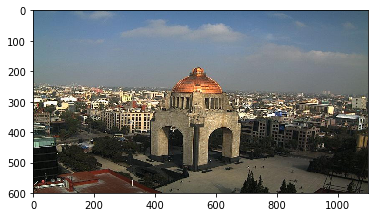

In [11]:
# Select an image by index
image_num = 0
selected_image = STANDARDIZED_LIST[image_num][0]
selected_label = STANDARDIZED_LIST[image_num][1]

# Display image and data about it
## TODO: Make sure the images have numerical labels and are of the same size
plt.imshow(selected_image)
print("Shape: "+str(selected_image.shape))
print("Label [1 = day, 0 = night]: " + str(selected_label))

Label: 1


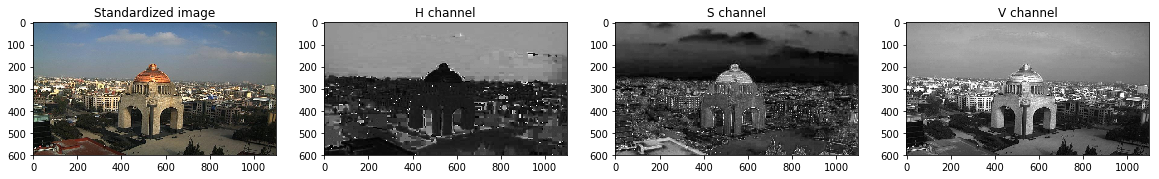

In [12]:
# Convert and image to HSV colorspace
# Visualize the individual color channels

image_num = 0
test_im = STANDARDIZED_LIST[image_num][0]
test_label = STANDARDIZED_LIST[image_num][1]

# Convert to HSV
hsv = cv2.cvtColor(test_im, cv2.COLOR_RGB2HSV)

# Print image label
print('Label: ' + str(test_label))

# HSV channels
h = hsv[:,:,0]
s = hsv[:,:,1]
v = hsv[:,:,2]

# Plot the original image and the three channels
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20,10))
ax1.set_title('Standardized image')
ax1.imshow(test_im)
ax2.set_title('H channel')
ax2.imshow(h, cmap='gray')
ax3.set_title('S channel')
ax3.imshow(s, cmap='gray')
ax4.set_title('V channel')
ax4.imshow(v, cmap='gray')

In [0]:
# Find the average Value or brightness of an image
def avg_brightness(rgb_image):
    hsv = cv2.cvtColor(rgb_image, cv2.COLOR_RGB2HSV)
    sum_brightness = np.sum(hsv[:,:,2])
    area = 600 * 1100
    avg = sum_brightness / area
    return avg

Avg brightness: 26.971457575757576


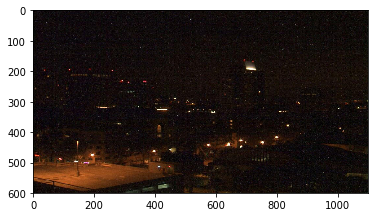

In [15]:
image_num = 190
test_im = STANDARDIZED_LIST[image_num][0]

avg = avg_brightness(test_im)
print('Avg brightness: ' + str(avg))
plt.imshow(test_im)

## Classification and visualizing errors

In [0]:
# This function should take in RGB image input
def estimate_label(rgb_image):
    
    average_brightness = avg_brightness(rgb_image)
    predicted_label = 0
    threshold = 120
    if average_brightness > threshold:
      predicted_label = 1
    
    return predicted_label    

Predicted:  1


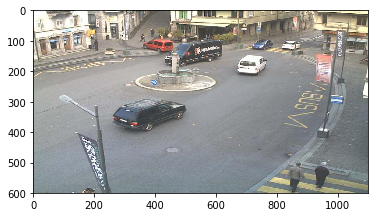

In [27]:
image_num = 89
test_im = STANDARDIZED_LIST[image_num][0]
plt.imshow(test_im)
predicted_label = estimate_label(test_im)
print('Predicted: ', predicted_label)

Predicted:  1


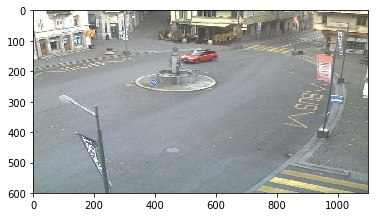

In [28]:
image_num = 20
test_im = STANDARDIZED_LIST[image_num][0]
plt.imshow(test_im)
predicted_label = estimate_label(test_im)
print('Predicted: ', predicted_label)

Predicted:  0


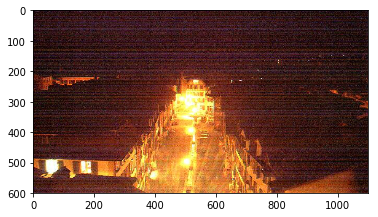

In [29]:
image_num = 120
test_im = STANDARDIZED_LIST[image_num][0]
plt.imshow(test_im)
predicted_label = estimate_label(test_im)
print('Predicted: ', predicted_label)

Predicted:  0


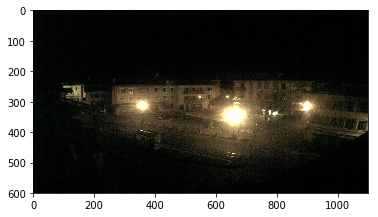

In [30]:
image_num = 125
test_im = STANDARDIZED_LIST[image_num][0]
plt.imshow(test_im)
predicted_label = estimate_label(test_im)
print('Predicted: ', predicted_label)